In [1]:
# Importing essential libraries
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
# Connect to Google Drive Account to retrieve image dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
# Inlializing face shape labels and image resolution
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)

In [6]:
# Function to load and preprocess images to have the same size and resolution
def load_data():
    training_dataset = "/content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/training_set"
    testing_dataset = "/content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/testing_set"
    datasets = [training_dataset, testing_dataset]
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]

                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    if file != "desktop.ini":
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            
                            image = cv2.imread(img_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [7]:
# Splitting Training datasets for both images and labels
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/training_set


 70%|██████▉   | 558/800 [00:20<00:08, 27.11it/s]

Broken: /content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/training_set/Oblong/oblong (724).jpg


100%|██████████| 800/800 [00:32<00:00, 24.55it/s]


Loading /content/drive/MyDrive/Modules/Term 2/Computational Intelligence Optimization/Project/Implementation/Face Shape Dataset/FaceShape Dataset/testing_set


100%|██████████| 200/200 [00:05<00:00, 37.15it/s]


In [8]:
# Assigning training and testing dataset randomly
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [9]:
# Displaying number of images in both training and testing datasets (following 80% 20% standard for training and testing datasets, respectively)
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = test_images / 255.0

Number of training examples: 3999
Number of testing examples: 1000
Each image is of size: (150, 150)


CNN Inialization

In [10]:
# Building CNN model
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(60, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(50, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(30, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(65, activation=tf.nn.softmax),
    tf.keras.layers.Dropout(0.2)

])

MLP Inialization

In [11]:
# Comiling CNN model prior to training
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
%%time
# Training CNN model
history = model.fit(train_images, train_labels, batch_size=128, epochs=200, validation_split = 0.2)

Epoch 1/200
25/25 [==============================] - 20s 332ms/step - loss: 4.3424 - accuracy: 0.2082 - val_loss: 1.6120 - val_accuracy: 0.2250
Epoch 2/200
25/25 [==============================] - 6s 233ms/step - loss: 4.1541 - accuracy: 0.2226 - val_loss: 1.5899 - val_accuracy: 0.2663
Epoch 3/200
25/25 [==============================] - 6s 239ms/step - loss: 4.2951 - accuracy: 0.2723 - val_loss: 1.5157 - val_accuracy: 0.3262
Epoch 4/200
25/25 [==============================] - 6s 253ms/step - loss: 4.3222 - accuracy: 0.2982 - val_loss: 1.4984 - val_accuracy: 0.3500
Epoch 5/200
25/25 [==============================] - 6s 250ms/step - loss: 4.2891 - accuracy: 0.3364 - val_loss: 1.4764 - val_accuracy: 0.3487
Epoch 6/200
25/25 [==============================] - 6s 243ms/step - loss: 4.1948 - accuracy: 0.3595 - val_loss: 1.4754 - val_accuracy: 0.3625
Epoch 7/200
25/25 [==============================] - 6s 234ms/step - loss: 4.1992 - accuracy: 0.3626 - val_loss: 1.4605 - val_accuracy: 0.385

In [16]:
# Plot function used to represent accuracy and loss function graphs against number of epochs for both training and testing datasets
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs (A)")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs (B)")

    plt.legend()
    plt.show()

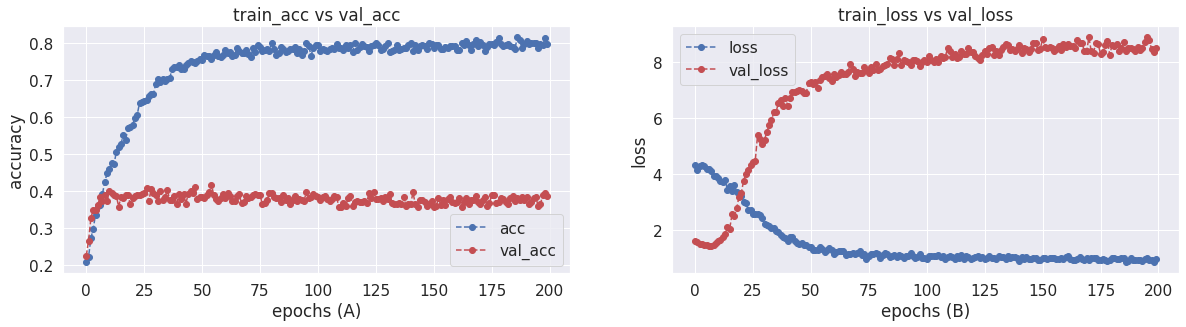

In [17]:
# Plotting graphs
plot_accuracy_loss(history)

In [18]:
# Getting average accuracy for both training and testing
train_loss = model.evaluate(train_images, train_labels)
test_loss = model.evaluate(test_images, test_labels)

32/32 [==============================] - 1s 24ms/step - loss: 8.5038 - accuracy: 0.3840


Actual label: Oblong
Predicted label: Oblong


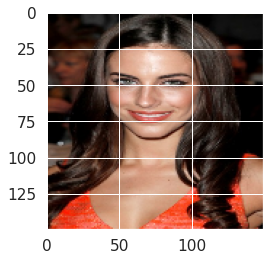

In [20]:
###### CNN #########
# Prediction and testing the model with input image
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
images = test_images
id = 250 #Successful Tests: 200, 250, 300, 305,47
plt.imshow(images[id])
print('Actual label:',class_names[test_labels[id]])
print('Predicted label:',class_names[pred_labels[id]])